# Sage vs TDB2

This benchmark compares the performance of **TDB2 query engine** vs **Sage query engine** on **WatDiv**: a dataset of roughly 10 millions of triples and 192 SPARQL queries.

It was run on a Macbook pro 2021 running macOS Ventura version 13.0.1; with a M1 Pro CPU 10 cores; GPU 16 cores; 16 Go RAM; 1 To SSD.

The results of the benchmark were saved in `.csv` files. This rest of this notebook only aims to display them in a pleasant manner.

In [84]:
!pip3 install pandas --quiet

import pandas as pd
import os

title_to_csv = {}
for filename in os.listdir():
    if filename.endswith(".csv"):
        try: 
            title_to_csv[filename] = pd.read_csv(filename)
        except:
            print(f"Error while reading {filename}, skipping…")

print(f"Just read {len(title_to_csv)} files…")
sorted = False;


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Error while reading WatdivBenchmark-Sage force order 30s-Short.csv, skipping…
Just read 7 files…



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


Text(0, 0.5, 'time (ms)')

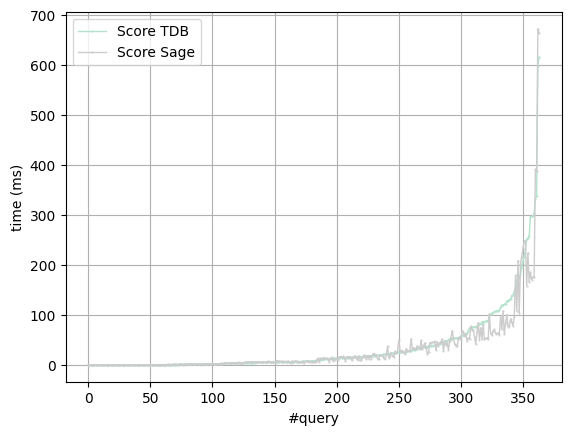

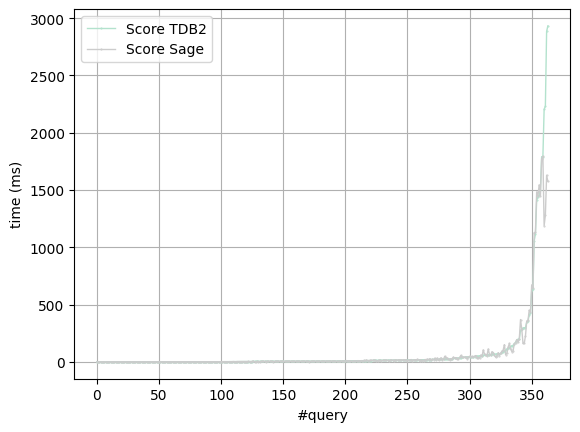

In [86]:
!pip3 install matplotlib --quiet
## %matplotlib ## `plt.show()` and `df.plot()` work better, maybe issue with macOS

import matplotlib.pyplot as plt


## format the column score as float
def columnToFloat(df, column):
    if df[column].dtypes != "float64":
        df[column] = df[column].str.replace(',', '.').astype(float)

columnToFloat(title_to_csv["WatdivBenchmark-Sage-Short.csv"], "Score")
columnToFloat(title_to_csv["WatdivBenchmark-TDB-Short.csv"], "Score")
columnToFloat(title_to_csv["WatdivBenchmark-TDB force order-Short.csv"], "Score")
columnToFloat(title_to_csv["WatdivBenchmark-Sage force order-Short.csv"], "Score")

## remove single short ("ss") values, only keep averaged
def keepOnlyAverageMode(df):
    df = df[df["Mode"] == "avgt"]
    
if not sorted:
    # df = df[df.line_race != 0]
    print("TODO this thing does not work yet ! TODO")
    keepOnlyAverageMode(title_to_csv["WatdivBenchmark-Sage-Short.csv"])
    keepOnlyAverageMode(title_to_csv["WatdivBenchmark-TDB-Short.csv"])
    keepOnlyAverageMode(title_to_csv["WatdivBenchmark-TDB force order-Short.csv"])
    keepOnlyAverageMode(title_to_csv["WatdivBenchmark-Sage force order-Short.csv"])

## Sort ASC by score
def sortByColumn(df, column):
    df.sort_values(by=[column], inplace=True)
    df.reset_index(drop = True, inplace = True)

if not sorted:
    force_order_df = pd.DataFrame()
    no_force_order_df = pd.DataFrame()
    no_force_order_df['Score TDB'] = title_to_csv["WatdivBenchmark-TDB-Short.csv"]['Score']
    no_force_order_df['Score Sage'] = title_to_csv["WatdivBenchmark-Sage-Short.csv"]['Score']
    force_order_df['Score TDB2'] = title_to_csv["WatdivBenchmark-TDB force order-Short.csv"]['Score']
    force_order_df['Score Sage'] = title_to_csv["WatdivBenchmark-Sage force order-Short.csv"]['Score']
    sortByColumn(no_force_order_df, "Score TDB")
    sortByColumn(force_order_df, "Score TDB2")
    sorted = True

## (TODO) better grid
axis = no_force_order_df.plot(grid=True, lw=1, colormap='Pastel2', marker='.', markersize=1,)
axis.set_xlabel("#query")
axis.set_ylabel("time (ms)")

axis = force_order_df.plot(grid=True, lw=1, colormap='Pastel2', marker='.', markersize=1,)
axis.set_xlabel("#query")
axis.set_ylabel("time (ms)")
